In [1]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
import statistics 

In [2]:
episodeno=7
#with open('star_wars_dataset/starwars-episode-%i-interactions-allCharacters.json' %episodeno) as f:
with open('star_wars_dataset/starwars-full-interactions-allCharacters.json') as f:
        js_graph1 = json.load(f)
js_graph = nx.json_graph.node_link_graph(js_graph1)
#nx.write_graphml(js_graph, "./episode_%i.graphml" %episodeno)
nx.write_graphml(js_graph, "./all_episodes.graphml")
cy = nx.json_graph.cytoscape_data(js_graph)
idtoname = {}
for i in cy["elements"]["nodes"]:
    idtoname[i['data']['id']]=  i['data']['name']
print(idtoname)

{'0': 'R2-D2', '1': 'CHEWBACCA', '2': 'BB-8', '3': 'QUI-GON', '4': 'NUTE GUNRAY', '5': 'PK-4', '6': 'TC-14', '7': 'OBI-WAN', '8': 'DOFINE', '9': 'RUNE', '10': 'TEY HOW', '11': 'EMPEROR', '12': 'CAPTAIN PANAKA', '13': 'SIO BIBBLE', '14': 'JAR JAR', '15': 'TARPALS', '16': 'BOSS NASS', '17': 'PADME', '18': 'RIC OLIE', '19': 'WATTO', '20': 'ANAKIN', '21': 'SEBULBA', '22': 'JIRA', '23': 'SHMI', '24': 'C-3PO', '25': 'DARTH MAUL', '26': 'KITSTER', '27': 'WALD', '28': 'FODE/BEED', '29': 'JABBA', '30': 'GREEDO', '31': 'VALORUM', '32': 'MACE WINDU', '33': 'KI-ADI-MUNDI', '34': 'YODA', '35': 'RABE', '36': 'BAIL ORGANA', '37': 'GENERAL CEEL', '38': 'BRAVO TWO', '39': 'BRAVO THREE', '40': 'CAPTAIN TYPHO', '41': 'SENATOR ASK AAK', '42': 'ORN FREE TAA', '43': 'SOLA', '44': 'JOBAL', '45': 'RUWEE', '46': 'TAUN WE', '47': 'LAMA SU', '48': 'BOBA FETT', '49': 'JANGO FETT', '50': 'OWEN', '51': 'BERU', '52': 'CLIEGG', '53': 'COUNT DOOKU', '54': 'SUN RIT', '55': 'POGGLE', '56': 'PLO KOON', '57': 'ODD BALL', 

In [3]:
#list_neighbors=js_graph.neighbors(11)
charno = 25
sums = statistics.median([i[2] for i in list(js_graph.edges(charno,'value'))])
print(sums)
nodes = [charno]
edge_values = []
closeconnections = []
for i in list(js_graph.edges(charno,'value')):
    if i[2]>sums:
        closeconnections.append(idtoname[str(i[1])])
        nodes.append(i[1])
        edge_values.append(0.5*(i[2]))
        print(idtoname[str(i[1])])

2.0
EMPEROR
NUTE GUNRAY


In [4]:
sub = js_graph.subgraph(nodes).copy()
sub.edges()

MultiEdgeDataView([(25, 11), (25, 4), (11, 4)])

In [5]:
remove = []
for e in sub.edges():
    if e[0] is not charno and e[1] is not charno:
        remove.append(e)
remove

[(11, 4)]

In [6]:
sub.remove_edges_from(remove)
sub.edges()

MultiEdgeDataView([(25, 11), (25, 4)])

C:\Users\karan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


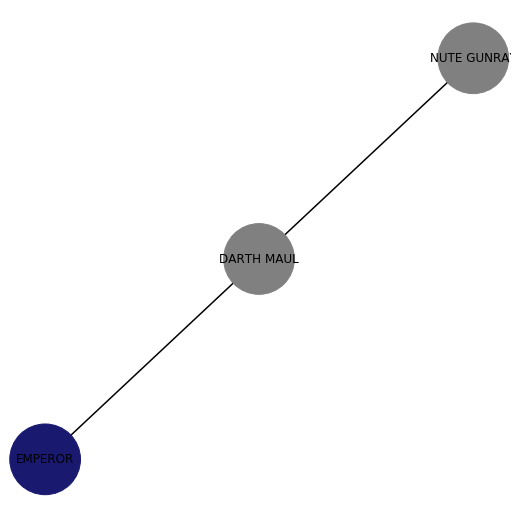

In [7]:
labels = nx.get_node_attributes(sub, 'name') 
colors = nx.get_node_attributes(sub, 'colour')
#nx.draw(sub)
plt.figure(figsize=(7,7))
nx.draw(sub,labels=labels,node_color = list(colors.values()), width = edge_values,  node_size = 5000)
plt.savefig("%s_network" %idtoname[str(charno)])